##Setup libraries, dataset path and movie genres

In [2]:
import pandas as pd
import os
dataset_path = "../dataset"
movie_genres = ['action', 'adventure', 'animation', 'biography', 'crime', 'family', 'fantasy', 
          'film-noir', 'history', 'horror', 'mystery', 'romance', 'scifi', 'sports', 
          'thriller', 'war']

##Read each file and store dataframes separately

In [3]:
# Define a dictionary to store dataframes for each genre
movies_by_genre = {}

# Update the dictionary
for file in os.listdir(dataset_path):
    for genre in movie_genres:
        if genre in file:
            if genre not in movies_by_genre:
                movies_by_genre[genre] = pd.read_csv(os.path.join(dataset_path, file))
            else:
                movies_by_genre[genre] = pd.concat([movies_by_genre[genre], pd.read_csv(os.path.join(dataset_path, file))])

# Print the number of rows and columns in each genre dataframe without any data quality checks
print("genre, number of rows, number of columns")
for genre, movies_df in movies_by_genre.items():
    print(genre, movies_df.shape)

genre, number of rows, number of columns
action (52452, 14)
adventure (25664, 14)
animation (8419, 14)
biography (8289, 14)
crime (35852, 14)
family (17095, 14)
fantasy (17163, 14)
film-noir (986, 14)
history (8996, 14)
horror (36682, 14)
mystery (18960, 14)
romance (52617, 14)
scifi (16557, 14)
sports (5292, 14)
thriller (53365, 14)
war (9911, 14)


##Perform data quality checks

In [4]:
# Dimensionality reduction
# for each dataframe in the dictionary, rename the columns and select only the columns we need
for genre, movies_df in movies_by_genre.items():
    movies_df.rename(columns={'gross(in $)': 'gross'}, inplace=True)
    movies_df.rename(columns={'movie_name': 'movie'}, inplace=True)
    movies_by_genre[genre] = movies_df[['movie', 'year', 'runtime', 'rating', 'director', 'star', 'votes', 'gross']]

# print the columns selected for each genre
for genre, movies_df in movies_by_genre.items():
    print(genre, movies_df.columns.values)

action ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
adventure ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
animation ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
biography ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
crime ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
family ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
fantasy ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
film-noir ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
history ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
horror ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
mystery ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
romance ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
scifi ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'v

##The study of trends over the years, specifically the popularity of genres
For this case study we will consider columns that can be used to visualize the trends in the movie industry over the years. We will consider the following columns: movie, year, runtime, rating, director, star. We will also consider the following columns for further analysis: gross

In [5]:
popularity_of_genres = {}
# remove null values 
for genre, movies_df in movies_by_genre.items():
    popularity_of_genres[genre] = movies_df[movies_df['year'].notnull()]

# number of rows containing null values for each genre
print("null values for each genre")
print("----------------------------------")
for genre, movies_df in movies_by_genre.items():
    print(genre, movies_df.shape[0] - popularity_of_genres[genre].shape[0])

null values for each genre
----------------------------------
action 8259
adventure 3689
animation 1369
biography 2005
crime 3563
family 1631
fantasy 2814
film-noir 0
history 1295
horror 7591
mystery 2004
romance 3437
scifi 4018
sports 575
thriller 10137
war 861


##Noise analysis

In [6]:
# try to normalize the year column values to a 4 digit year format
for genre, movies_df in popularity_of_genres.items():
    popularity_of_genres[genre]['year'] = popularity_of_genres[genre]['year'].astype(str).str[:4]

# remove values that are not in the years 1950-2023
for genre, movies_df in popularity_of_genres.items():
    popularity_of_genres[genre] = movies_df.loc[(movies_df['year'] >= '1950') & (movies_df['year'] <= '2023')]

# check if there are noises in the year column
for genre, movies_df in popularity_of_genres.items():
    print(genre, movies_df.loc[(movies_df['year'] < '1950') | (movies_df['year'] > '2023')].shape[0])


C:\Users\fisni\AppData\Local\Temp\ipykernel_95924\1924197460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_of_genres[genre]['year'] = popularity_of_genres[genre]['year'].astype(str).str[:4]
C:\Users\fisni\AppData\Local\Temp\ipykernel_95924\1924197460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_of_genres[genre]['year'] = popularity_of_genres[genre]['year'].astype(str).str[:4]
C:\Users\fisni\AppData\Local\Temp\ipykernel_95924\1924197460.py:3: SettingWithCopyWarning: 
A valu

action 0
adventure 0
animation 0
biography 0
crime 0
family 0
fantasy 0
film-noir 0
history 0
horror 0
mystery 0
romance 0
scifi 0
sports 0
thriller 0
war 0


##Feature Generation

In [7]:
# create a new column genre
for genre, movies_df in popularity_of_genres.items():
    popularity_of_genres[genre]['genre'] = genre

# combine all the dataframes into one
all_movie_genres = pd.concat(popularity_of_genres.values())

# list the amount of movies for each year based on genre
print(all_movie_genres.groupby(['year', 'genre']).size())

year  genre    
1950  action       100
      adventure    114
      animation      8
      biography     20
      crime        215
                  ... 
2023  romance      399
      scifi        233
      sports        45
      thriller     659
      war           47
Length: 1119, dtype: int64


In [8]:
# show top 1 movie genre for each year
print(all_movie_genres.groupby(['year', 'genre']).size().groupby(level=0, group_keys=False).nlargest(1))

year  genre   
1950  romance      221
1951  romance      272
1952  romance      253
1953  romance      265
1954  romance      289
                  ... 
2019  thriller    1711
2020  thriller    1431
2021  thriller    1737
2022  thriller    2129
2023  thriller     659
Length: 74, dtype: int64


In [9]:
# Find the most frequent genre
result = all_movie_genres.groupby(['year', 'genre']).size().groupby(level=0, group_keys=False).nlargest(1)

most_frequent_genre = result.idxmax()[1]

print("The genre with the most top 1 placings throughout the years is:", most_frequent_genre)

The genre with the most top 1 placings throughout the years is: thriller


### Outlier Detection

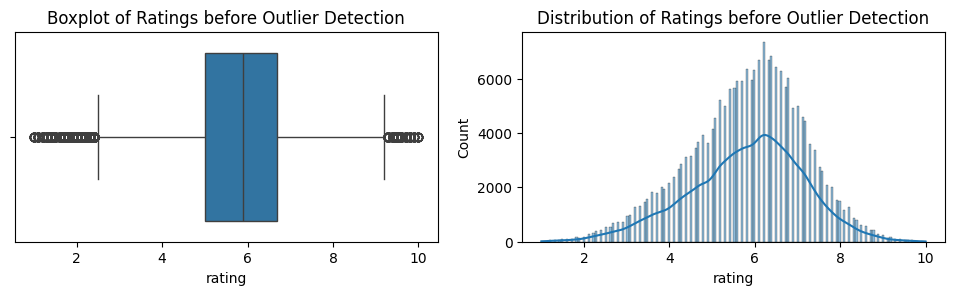

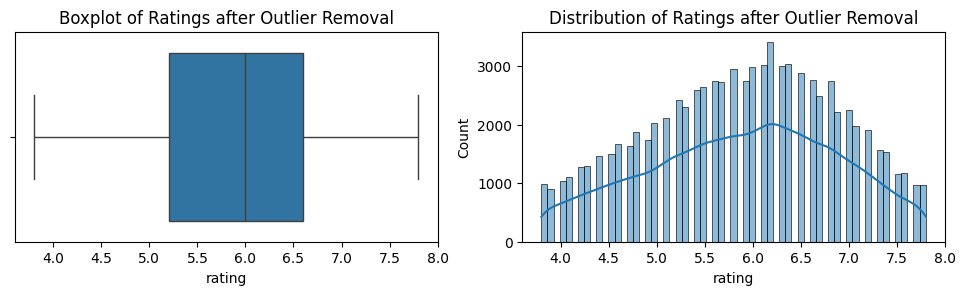

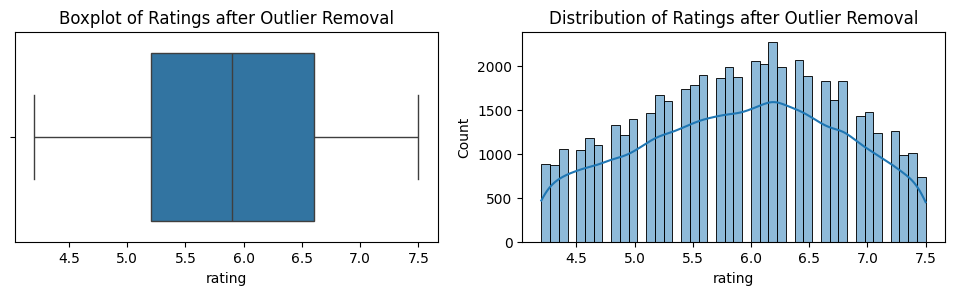

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'rating' before outlier detection
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=all_movie_genres['rating'])
plt.title('Boxplot of Ratings before Outlier Detection')

plt.subplot(2, 2, 2)
sns.histplot(all_movie_genres['rating'], kde=True)
plt.title('Distribution of Ratings before Outlier Detection')

def detect_outliers_zscore(df, column_name, threshold=1.5):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    outliers = df[(z_scores > threshold)]
    return outliers

def detect_outliers_iqr(df, column_name, threshold=0.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column_name] < Q1 - threshold * IQR) | (df[column_name] > Q3 + threshold * IQR)]
    return outliers


# Detect outliers using z-score
outliers_zscore = detect_outliers_zscore(all_movie_genres, 'rating')
filtered_df_zscore = all_movie_genres[~all_movie_genres.index.isin(outliers_zscore.index)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.boxplot(x=filtered_df_zscore['rating'])
plt.title('Boxplot of Ratings after Outlier Removal')

plt.subplot(2, 2, 4)
sns.histplot(filtered_df_zscore['rating'], kde=True)
plt.title('Distribution of Ratings after Outlier Removal')

plt.show()

# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(all_movie_genres, 'rating')
filtered_df_iqr = all_movie_genres[~all_movie_genres.index.isin(outliers_iqr.index)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=filtered_df_iqr['rating'])
plt.title('Boxplot of Ratings after Outlier Removal')

plt.subplot(2, 2, 2)
sns.histplot(filtered_df_iqr['rating'], kde=True)
plt.title('Distribution of Ratings after Outlier Removal')

plt.show()